# Pytheam - Project 1
----

### Summary
This notebook shows the process we followed to clean, explore and analyze the data sets that contains information about the __Ecobici stations__ and the __Mexico City's Unified System of Transportation__.

---

In [120]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Dataset available in https://datos.cdmx.gob.mx/explore/dataset/estaciones-de-ecobici/download/?format=xls&timezone=America/Mexico_City&use_labels_for_header=true
# Modified in Excel with a function to add the fields "colonia" and "delegacion"
# Corrected manually to assign the right value for the field "colonia", the resulting file (a csv) is in the folder Resources

# Save path to data set in a variable
data_file = "../Resources/estaciones_de_ecobici_2.csv"

# Use Pandas to read data
df_estac = pd.read_csv(data_file) 

# Show the results
df_estac.head()

,ID,Nombre,Dirección,Número,districtCode,Colonia,Delegacion,altitude,nearbyStations/0,location/lat,location/lon,Tipo de estación,nearbyStations/1,nearbyStations/2,nearbyStations/3,nearbyStations/4,nearbyStations/5,punto_geo
0,1,1 RIO SENA-RIO BALSAS,001 - Río Sena-Río Balsas,S/N,CUA,Cuauhtémoc,Cuauhtémoc,NaN,3,19.433571,-99.167809,"BIKE,TPV",8.0,85.0,NaN,NaN,NaN,"19.4335714, -99.1678091"
1,2,2 RIO GUADALQUIVIR-RIO BALSAS,002 - Río Guadalquivir - Río Balsas,S/N,CUA,Cuauhtémoc,Cuauhtémoc,NaN,1,19.431386,-99.171695,BIKE,5.0,NaN,NaN,NaN,NaN,"19.431386, -99.171695"
2,3,3 REFORMA-INSURGENTES,003 - Reforma - Insurgentes,S/N,1,Tabacalera,Cuauhtémoc,NaN,8,19.431655,-99.158668,"BIKE,TPV",20.0,86.0,NaN,NaN,NaN,"19.431655, -99.158668"
3,4,4 RIO NILO-RIO PANUCO,004 - Río Nilo - Río Panuco,S/N,CUA,Cuauhtémoc,Cuauhtémoc,NaN,5,19.428309,-99.171713,BIKE,8.0,9.0,10.0,NaN,NaN,"19.428309, -99.171713"
4,5,5 RIO PANUCO-RIO TIBER,005 - Río Pánuco Río Tiber,S/N,CUA,Cuauhtémoc,Cuauhtémoc,NaN,2,19.429720,-99.169363,BIKE,4.0,9.0,10.0,NaN,NaN,"19.42972, -99.169363"


In [ ]:
#Calculate distance between latitude longitude pairs with Python -  haversine.py
# Available in https://gist.github.com/rochacbruno/2883505

# Function to calculate the distance between two points using coordinates
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [ ]:
#Test 1
distance((19.433571399999998, -99.16780909999999), (19.365011, -99.181747)) * 1.1

In [ ]:
#Test 2
distance((-99.167809, 19.433571), (-99.141558, 19.435960)) * 1.1

In [167]:
# Show number of records
print(f'Number of Ecobici stations: {len(df_estac)}')

Number of Ecobici stations: 480


In [4]:
# Show info of dataframe
df_estac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 18 columns):
ID                  480 non-null int64
Nombre              480 non-null object
Dirección           480 non-null object
Número              480 non-null object
districtCode        479 non-null object
Colonia             480 non-null object
Delegacion          480 non-null object
altitude            0 non-null float64
nearbyStations/0    480 non-null int64
location/lat        480 non-null float64
location/lon        480 non-null float64
Tipo de estación    480 non-null object
nearbyStations/1    463 non-null float64
nearbyStations/2    421 non-null float64
nearbyStations/3    36 non-null float64
nearbyStations/4    3 non-null float64
nearbyStations/5    3 non-null float64
punto_geo           480 non-null object
dtypes: float64(8), int64(2), object(8)
memory usage: 67.6+ KB


In [5]:
# Records per alcaldias (municipalities)
df_estac['Delegacion'].value_counts()

Cuauhtémoc        199
Benito Juárez     168
Miguel Hidalgo    113
Name: Delegacion, dtype: int64

In [6]:
# Records per colonia (suburb)
df_estac['Colonia'].value_counts()

Polanco                             46
Roma Norte                          37
Juárez                              31
Centro                              30
Del Valle Sur                       23
Roma Sur                            20
Hipódromo                           17
Nápoles                             17
Del Valle Norte                     16
Del Valle Centro                    15
Cuauhtémoc                          15
Narvarte Poniente                   15
Anzures                             14
Escandón                            13
Buenavista                          12
San Rafael                          12
Santa Cruz Atoyac                   11
Condesa                             10
San Pedro de los Pinos               9
Insurgentes Mixcoac                  9
Granada                              8
San Miguel Chapultepec               8
Tabacalera                           7
Tlacoquemecatl                       7
General Pedro Maria Anaya            7
Ciudad de los Deportes   

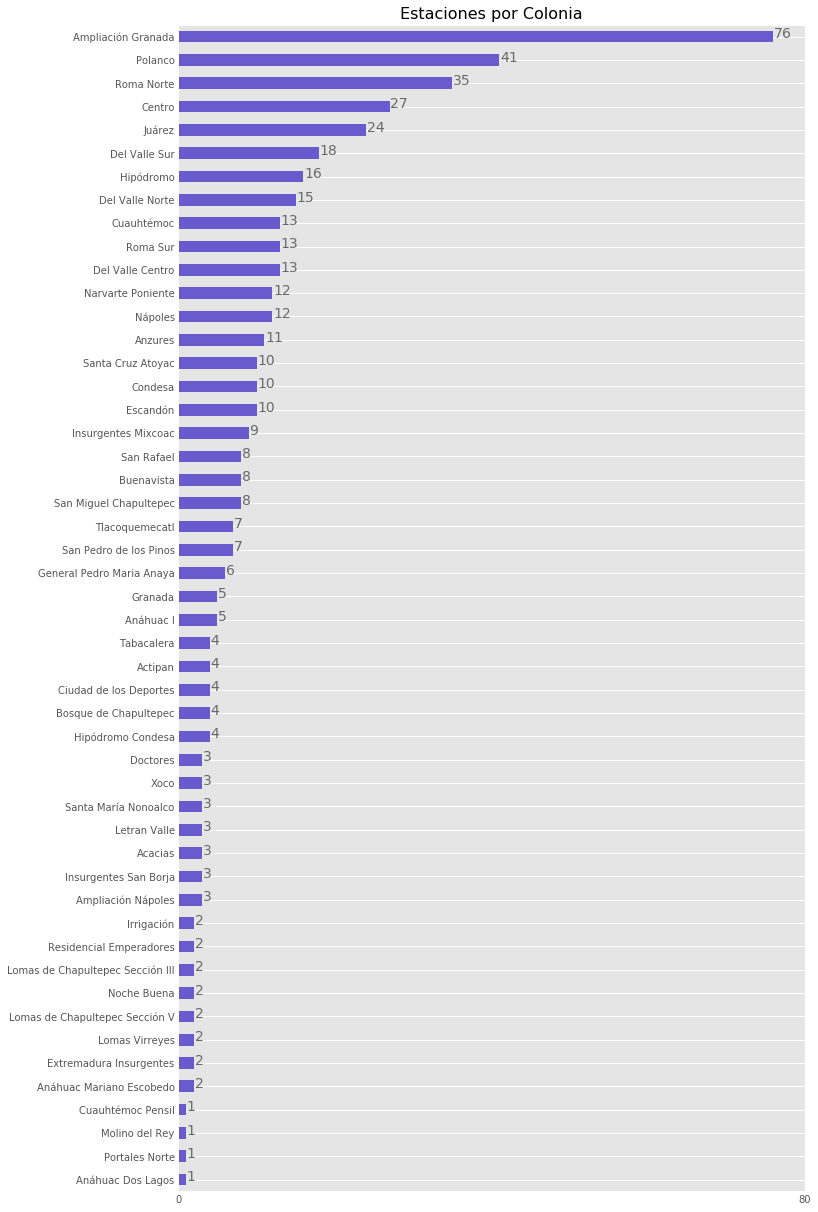

In [336]:
# Plot the different values per colonia
ax = df_estac['Colonia'].value_counts().plot(kind='barh', figsize=(10,20), color="slateblue", fontsize=10);
ax.set_alpha(0.8)
ax.set_title("Estaciones por Colonia", fontsize=16)
ax.set_xticks([0, 80])

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=14, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

In [7]:
# Dataset available in https://datos.cdmx.gob.mx/explore/dataset/estaciones-paradas-y-terminales-del-sistema-de-transporte-unificado/export/
# Estaciones, paradas y terminales del sistema de transporte unificado de la Ciudad de México. Contiene las 6021 estaciones o paradas georrefenciadas correspondientes a: Corredores concesionados, Metrobús, Sistema de Transporte Colectivo Metro, Nochebús Corredores concesionados, Red de Transporte de Pasajeros (RTP), Regresa seguro a casa (RTP), Servicio de Transportes Eléctricos (STE) y Ferrocarriles Suburbanos.

# Save path to data set in a variable
data_file = "../Resources/transporte-unificado.csv"

# Use Pandas to read data
df_trans = pd.read_csv(data_file, delimiter=';') 

# Show the results
df_trans.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,wheelchair_boarding,geopoint
0,14190,NaN,Deportivo 18 de Marzo_1_4,Metro Línea 6 correspondencia con línea 3.,19.483585,-99.125766,NaN,NaN,0,NaN,0,"19.48358544, -99.12576556"
1,14187,NaN,Deportivo 18 de Marzo_1_3,Metro Línea 3 correspondencia con línea 6.,19.484051,-99.125433,NaN,NaN,0,NaN,0,"19.4840507, -99.12543297"
2,14921,NaN,Deportivo 18 de Marzo_1,Estación de Metrobús. Línea 1Cuerpo oriente,19.486366,-99.124329,NaN,NaN,0,NaN,2,"19.486366, -99.124329"
3,40018,NaN,Deportivo Eduardo Molina,ESTACIÓN SENCILLA UN ACCESO,19.445207,-99.111958,NaN,NaN,0,NaN,1,"19.44520659, -99.11195755"
4,136312,NaN,Deportivo 18 de Marzo,Descripción,19.486832,-99.122901,NaN,NaN,0,NaN,1,"19.48683215, -99.12290096"


In [231]:
# Show number of records
print(f'Number of stops in "Sistema de Transporte Unificado de la Ciudad de México": {len(df_trans)}')

Number of stops in "Sistema de Transporte Unificado de la Ciudad de México": 6021


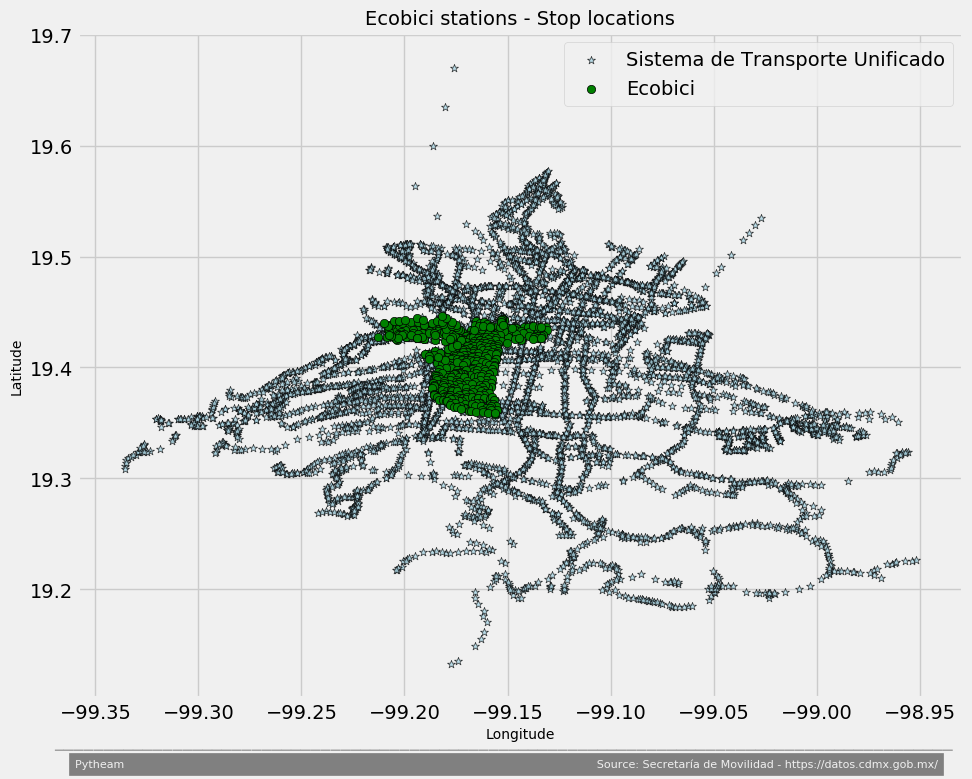

In [197]:
# Use a specific syle for the plot
with plt.style.context('fivethirtyeight', after_reset=True):
    
    # Set values for the plot properties
    plt.figure(figsize=(10,8))
    plt.title("Ecobici stations - Stop locations", fontsize=14)
    plt.xlabel("Longitude", fontsize=10)
    plt.ylabel("Latitude", fontsize=10)
    plt.text(x = -99.37, y = 19.06,s = '___________________________________________________________________________________________', color = 'grey', alpha = .7)
    plt.text(x = -99.36, y = 19.04,s = 'Pytheam                                                                                                                                       Source: Secretaría de Movilidad - https://datos.cdmx.gob.mx/',fontsize = 8, color = '#f0f0f0', backgroundcolor = 'grey')

    # Plot the values
    plt.scatter(df_trans['stop_lon'], df_trans['stop_lat'], marker="*", label="Sistema de Transporte Unificado", facecolors="lightblue", edgecolors="black", alpha="0.8")
    plt.scatter(df_estac['location/lon'], df_estac['location/lat'], marker="o", label="Ecobici", facecolors="green", edgecolors="black")

    # Set the location for the legend
    plt.legend(loc="best")

    # Save the Figure
    plt.tight_layout()
    plt.savefig("../Output/Ecobici_STUCDMX.png")

    # Show the Figure
    plt.show()    

In [9]:
# Dataset available in https://datos.cdmx.gob.mx/explore/dataset/estaciones-metro/export/
# Save path to data set in a variable
data_file = "../Resources/estaciones-metro.csv"

# Use Pandas to read data
df_trans_metro = pd.read_csv(data_file, delimiter=';') 

# Show the results
df_trans_metro.head()

,Geometry,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,trip_heads,agency_id,Geopoint
0,"{""type"": ""Point"", ""coordinates"": [-99.14155841...",14162.0,NaN,Bellas Artes_1_2,Metro Línea 2 correspondencia con línea 8.,19.435960,-99.141558,Cuatro Caminos - Tasqueña,METRO,"19.43595951, -99.14155841"
1,"{""type"": ""Point"", ""coordinates"": [-99.11589503...",14181.0,NaN,Canal del Norte_1,Metro 4,19.448667,-99.115895,Martín Carrera - Santa Anita,METRO,"19.44866652, -99.11589503"
2,"{""type"": ""Point"", ""coordinates"": [-99.17122364...",14124.0,NaN,Colegio Militar,Metro 2,19.448646,-99.171224,Cuatro Caminos - Tasqueña,METRO,"19.44864628, -99.17122364"
3,"{""type"": ""Point"", ""coordinates"": [-99.15289879...",14170.0,NaN,Buenavista_1_4,Metro B,19.446158,-99.152899,Buenavista - Ciudad Azteca,METRO,"19.44615757, -99.15289879"
4,"{""type"": ""Point"", ""coordinates"": [-99.17658806...",14119.0,NaN,Chapultepec,Metro 1,19.420256,-99.176588,Observatorio - Pantitlán,METRO,"19.42025648, -99.17658806"


In [40]:
# Show info of dataframe
df_trans_metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 10 columns):
Geometry      195 non-null object
stop_id       195 non-null float64
stop_code     0 non-null float64
stop_name     195 non-null object
stop_desc     195 non-null object
stop_lat      195 non-null float64
stop_lon      195 non-null float64
trip_heads    195 non-null object
agency_id     195 non-null object
Geopoint      195 non-null object
dtypes: float64(4), object(6)
memory usage: 15.3+ KB


In [232]:
# Show the number of recprds
print(f'Number of stops in "Sistema de Transporte Colectivo - Metro": {len(df_trans_metro)}')

Number of stops in "Sistema de Transporte Colectivo - Metro": 195


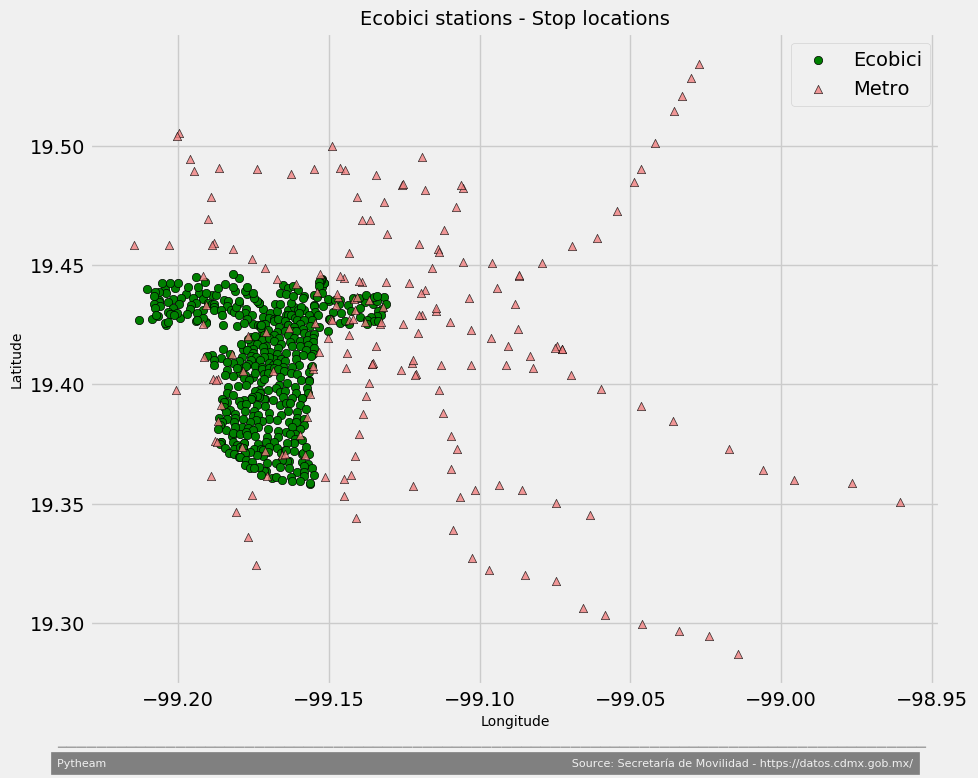

In [220]:
# Use a specific syle for the plot
with plt.style.context('fivethirtyeight', after_reset=True):
    
    # Set values for the plot properties
    plt.figure(figsize=(10,8))
    plt.title("Ecobici stations - Stop locations", fontsize=14)
    plt.xlabel("Longitude", fontsize=10)
    plt.ylabel("Latitude", fontsize=10)
    plt.text(x = -99.24, y = 19.25,s = '________________________________________________________________________________________', color = 'grey', alpha = .7)
    plt.text(x = -99.24, y = 19.24,s = 'Pytheam                                                                                                                                     Source: Secretaría de Movilidad - https://datos.cdmx.gob.mx/',fontsize = 8, color = '#f0f0f0', backgroundcolor = 'grey')

    # Plot the values
    plt.scatter(df_estac['location/lon'], df_estac['location/lat'], label="Ecobici", marker="o", facecolors="green", edgecolors="black")
    plt.scatter(df_trans_metro['stop_lon'], df_trans_metro['stop_lat'], label="Metro", marker="^", facecolors="lightcoral", edgecolors="black", alpha=".8")

    # Set the location for the legend
    plt.legend(loc="best")

    # Save the Figure
    plt.tight_layout()
    plt.savefig("../Output/Ecobici_Metro.png")

    # Show the Figure
    plt.show() 

In [10]:
# Save path to data set in a variable
data_file = "../Resources/estaciones-metrobus.csv"

# Use Pandas to read data
df_trans_metrobus = pd.read_csv(data_file, delimiter=';') 

# Show the results
df_trans_metrobus.head()

,wkt_geom,Nombre,Línea,Longitud,Latitud,Geopoint
0,PointZ (-99.18174700000001565 19.3650109999999...,Teatro de los Insurgentes,Línea 1,-99.181747,19.365011,"19.365011, -99.181747"
1,PointZ (-99.17604099999999789 19.3826010000000...,Ciudad de los Deportes,Línea 1,-99.176041,19.382601,"19.382601, -99.176041"
2,PointZ (-99.182715999999985 19.361983999999999...,José María Velasco,Línea 1,-99.182716,19.361984,"19.361984, -99.182716"
3,PointZ (-99.1804429999999968 19.36908000000000...,Río Churubusco,Línea 1,-99.180443,19.369080,"19.36908, -99.180443"
4,PointZ (-99.17368299999999692 19.3898580000000...,Nápoles,Línea 1,-99.173683,19.389858,"19.389858, -99.173683"


In [49]:
# Show the info from the dataframe
df_trans_metrobus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 6 columns):
wkt_geom    234 non-null object
Nombre      234 non-null object
Línea       234 non-null object
Longitud    234 non-null float64
Latitud     234 non-null float64
Geopoint    234 non-null object
dtypes: float64(2), object(4)
memory usage: 11.0+ KB


In [168]:
# Show the number of recprds
print(f'Number of stops in "Metrobus": {len(df_trans_metrobus)}')

Number of stops in "Metrobus": 234


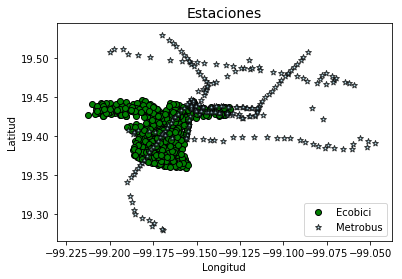

In [269]:
# Use a specific syle for the plot
with plt.style.context('fivethirtyeight', after_reset=True):
    
    # Set values for the plot properties
    plt.figure(figsize=(10,8))
    plt.title("Ecobici stations - Stop locations", fontsize=14)
    plt.xlabel("Longitude", fontsize=10)
    plt.ylabel("Latitude", fontsize=10)
    plt.text(x = -99.24, y = 19.25,s = '________________________________________________________________________________________', color = 'grey', alpha = .7)
    plt.text(x = -99.24, y = 19.24,s = 'Pytheam                                                                                                                                     Source: Secretaría de Movilidad - https://datos.cdmx.gob.mx/',fontsize = 8, color = '#f0f0f0', backgroundcolor = 'grey')

    # Plot the values
    plt.scatter(df_estac['location/lon'], df_estac['location/lat'], label="Ecobici", marker="o", facecolors="green", edgecolors="black")
    plt.scatter(df_trans_metrobus['Longitud'], df_trans_metrobus['Latitud'], label="Metrobus",  marker="*", facecolors="lightblue", edgecolors="black", alpha=".8")

    # Set the location for the legend
    plt.legend(loc="best")

    # Save the Figure
    plt.tight_layout()
    plt.savefig("../Output/Ecobici_Metrobus.png")

    # Show the Figure
    plt.show() 

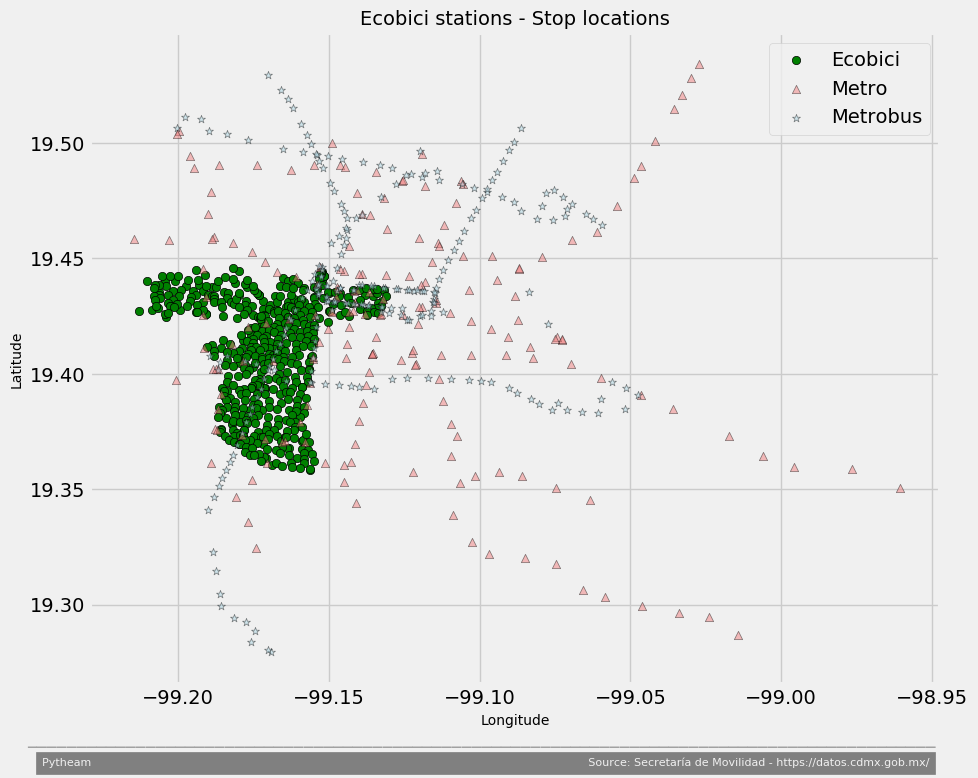

In [230]:
# Use a specific syle for the plot
with plt.style.context('fivethirtyeight', after_reset=True):
    
    # Set values for the plot properties
    plt.figure(figsize=(10,8))
    plt.title("Ecobici stations - Stop locations", fontsize=14)
    plt.xlabel("Longitude", fontsize=10)
    plt.ylabel("Latitude", fontsize=10)
    plt.text(x = -99.25, y = 19.24,s = '____________________________________________________________________________________________', color = 'grey', alpha = .7)
    plt.text(x = -99.245, y = 19.23,s = 'Pytheam                                                                                                                                              Source: Secretaría de Movilidad - https://datos.cdmx.gob.mx/',fontsize = 8, color = '#f0f0f0', backgroundcolor = 'grey')

    # Plot the values
    plt.scatter(df_estac['location/lon'], df_estac['location/lat'], label="Ecobici", marker="o", facecolors="green", edgecolors="black")
    plt.scatter(df_trans_metro['stop_lon'], df_trans_metro['stop_lat'], label="Metro", marker="^", facecolors="lightcoral", edgecolors="black", alpha=".5")
    plt.scatter(df_trans_metrobus['Longitud'], df_trans_metrobus['Latitud'], label="Metrobus",  marker="*", facecolors="lightblue", edgecolors="black", alpha=".5")

    # Set the location for the legend
    plt.legend(loc="best")

    # Save the Figure
    plt.tight_layout()
    plt.savefig("../Output/Ecobici_M_Mbus.png")

    # Show the Figure
    plt.show()


In [11]:
# Save path to data set in a variable
data_file = "../Resources/paradas-de-trolebus.csv"

# Use Pandas to read data
df_trans_trole = pd.read_csv(data_file, delimiter=';') 

# Show the results
df_trans_trole.head()

,Geometry,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,trip_heads,agency_id,route_long,geo_point_2d
0,"{""type"": ""Point"", ""coordinates"": [-99.08804195...",17961.0,NaN,METRO TERMINAL AÉREA,Rosario Puerto Aereo,19.434086,-99.088042,Metro Blvd. Puerto Aéreo - Metro El Rosario,STE,Metro Blvd. Puerto Aéreo - Metro El Rosario,"19.43408626, -99.08804195"
1,"{""type"": ""Point"", ""coordinates"": [-99.18885112...",17911.0,NaN,MANUEL ACUÑA,Rosario Puerto Aereo,19.479368,-99.188851,Metro El Rosario - Metro Blvd. Puerto Aéreo,STE,Metro Blvd. Puerto Aéreo - Metro El Rosario,"19.47936765, -99.18885112"
2,"{""type"": ""Point"", ""coordinates"": [-99.19525623...",18009.0,NaN,METRO AQUILES SERDÁN_1_3,Rosario Puerto Aereo,19.490898,-99.195256,Metro Chapultepec - Metro El Rosario,STE,Metro El Rosario - Metro Chapultepec,"19.49089803, -99.19525623"
3,"{""type"": ""Point"", ""coordinates"": [-99.10747693...",17812.0,NaN,METRO MARTÍN CARRERA,San Felipe Metro Hidalgo,19.482973,-99.107477,San Felipe de Jesús - Metro Hidalgo,STE,San Felipe de Jesús - Metro Hidalgo,"19.48297253, -99.10747693"
4,"{""type"": ""Point"", ""coordinates"": [-99.08547912...",17963.0,NaN,MORELOS_1_5,Rosario Puerto Aereo,19.439859,-99.085479,Metro Blvd. Puerto Aéreo - Metro El Rosario,STE,Metro Blvd. Puerto Aéreo - Metro El Rosario,"19.4398591, -99.08547912"


In [58]:
# Show the info of the dataframe
df_trans_trole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 11 columns):
Geometry        596 non-null object
stop_id         596 non-null float64
stop_code       0 non-null float64
stop_name       596 non-null object
stop_desc       517 non-null object
stop_lat        596 non-null float64
stop_lon        596 non-null float64
trip_heads      596 non-null object
agency_id       596 non-null object
route_long      596 non-null object
geo_point_2d    596 non-null object
dtypes: float64(4), object(7)
memory usage: 51.3+ KB


In [233]:
# Show the number of recprds
print(f'Number of stops in "Sistema de Transporte Eléctrico - Trolebus": {len(df_trans_trole)}')

Number of stops in "Sistema de Transporte Eléctrico - Trolebus": 596


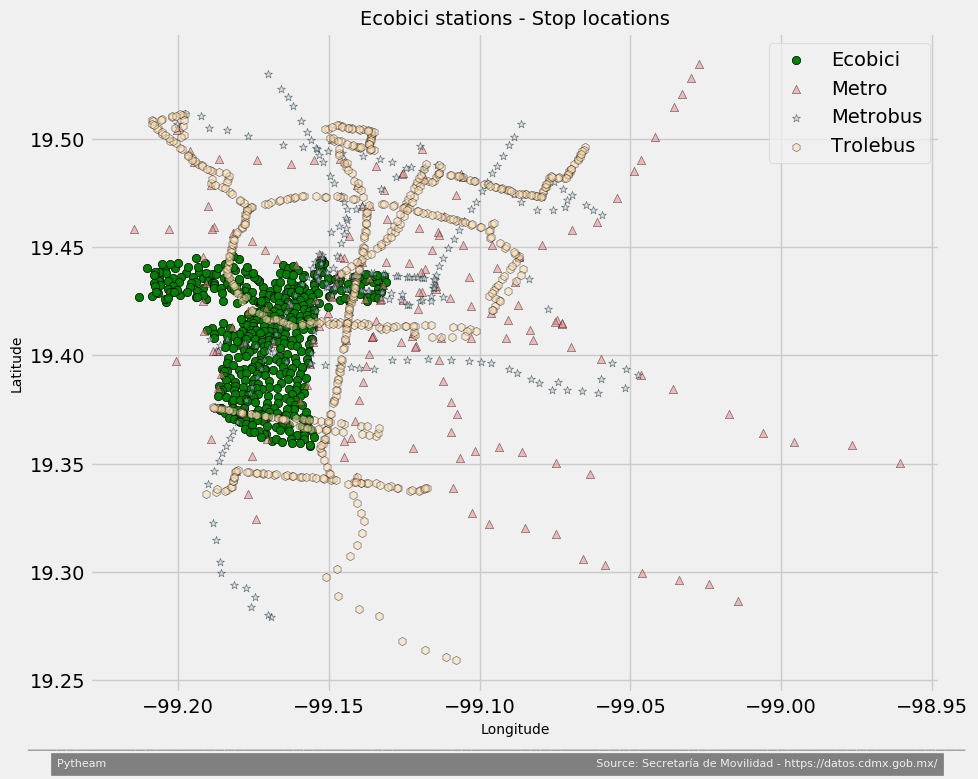

In [162]:
# Use a specific syle for the plot
with plt.style.context('fivethirtyeight', after_reset=True):
    
    # Set values for the plot properties
    plt.figure(figsize=(10,8))
    plt.title("Ecobici stations - Stop locations", fontsize=14)
    plt.xlabel("Longitude", fontsize=10)
    plt.ylabel("Latitude", fontsize=10)
    plt.text(x = -99.25, y = 19.22,s = '_______________________________________________________________________________________________', color = 'grey', alpha = .7)
    plt.text(x = -99.24, y = 19.21,s = 'Pytheam                                                                                                                                            Source: Secretaría de Movilidad - https://datos.cdmx.gob.mx/',fontsize = 8, color = '#f0f0f0', backgroundcolor = 'grey')

    # Plot the values
    plt.scatter(df_estac['location/lon'], df_estac['location/lat'], label="Ecobici", marker="o", facecolors="green", edgecolors="black")
    plt.scatter(df_trans_metro['stop_lon'], df_trans_metro['stop_lat'], label="Metro", marker="^", facecolors="lightcoral", edgecolors="black", alpha=".5")
    plt.scatter(df_trans_metrobus['Longitud'], df_trans_metrobus['Latitud'], label="Metrobus",  marker="*", facecolors="lightblue", edgecolors="black", alpha=".5")
    plt.scatter(df_trans_trole['stop_lon'], df_trans_trole['stop_lat'], label="Trolebus", marker="h", facecolors="navajowhite", edgecolors="black", alpha=".5")

    # Set the location for the legend
    plt.legend(loc="best")

    # Save the Figure
    plt.tight_layout()
    plt.savefig("../Output/Ecobici_M_Mbus_Trole.png")

    # Show the Figure
    plt.show()
    

In [56]:
# Iterate the ecobici stations dataframe to find the distance in kms to each Metro stop 
dist_list = []
for i in range(0, len(df_estac)):
    eco_lat = df_estac.iloc[i]['location/lat']
    eco_lon = df_estac.iloc[i]['location/lon']

    for j in range(0, len(df_trans_metro)):
        mt_lat = df_trans_metro.iloc[j]['stop_lat'] 
        mt_lon = df_trans_metro.iloc[j]['stop_lon']
       
        # Add a 10% to the distance to simulate the walking distance
        dist = distance((eco_lat, eco_lon), (mt_lat, mt_lon)) * 1.1
        
        # Create a dictionary with the info for the dataframe
        distances = {
            "id_eco" : df_estac.iloc[i]['ID'],
            "lat_eco" : eco_lat,
            "lon_eco" : eco_lon,
            "col_eco" : df_estac.iloc[i]['Colonia'],
            "alc_eco" : df_estac.iloc[i]['Delegacion'],
            "agency_id" : df_trans_metro.iloc[j]['agency_id'],
            "id_est" : df_trans_metro.iloc[j]['stop_id'],
            "lat_est" : mt_lat,
            "loc_est" : mt_lon,
            "name_est" : df_trans_metro.iloc[j]['stop_name'],
            "head_est" : df_trans_metro.iloc[j]['trip_heads'],
            "distance_kms" : dist
        }

        # Add the values to the list
        dist_list.append(distances)
        
#print(distances)

{'id_eco': 480, 'lat_eco': 19.446073000000002, 'lon_eco': -99.18165400000001, 'col_eco': 'Anáhuac Mariano Escobedo', 'alc_eco': 'Miguel Hidalgo', 'agency_id': 'METRO', 'id_est': 14217.0, 'lat_est': 19.41179726, 'loc_est': -99.08322573, 'name_est': 'Zaragoza', 'head_est': 'Observatorio - Pantitlán', 'distance_kms': 12.102937201380731}


In [46]:
# Show the number of distances calculated
len(dist_list)

93600

In [57]:
# Iterate the ecobici stations dataframe to find the distance in kms to each Metrobus stop
distbus_list = []
for i in range(0, len(df_estac)):
    eco_lat = df_estac.iloc[i]['location/lat']
    eco_lon = df_estac.iloc[i]['location/lon']

    for j in range(0, len(df_trans_metrobus)):
        mtbus_lat = df_trans_metrobus.iloc[j]['Latitud'] 
        mtbus_lon = df_trans_metrobus.iloc[j]['Longitud']
       
        # Add a 10% to the distance to simulate the walking distance
        dist = distance((eco_lat, eco_lon), (mtbus_lat, mtbus_lon)) * 1.1

        # Create a dictionary with the info for the dataframe
        distances = {
            "id_eco" : df_estac.iloc[i]['ID'],
            "lat_eco" : eco_lat,
            "lon_eco" : eco_lon,
            "col_eco" : df_estac.iloc[i]['Colonia'],
            "alc_eco" : df_estac.iloc[i]['Delegacion'],
            "agency_id" : "METROBUS",
            "id_est" : j,
            "lat_est" : mtbus_lat,
            "loc_est" : mtbus_lon,
            "name_est" : df_trans_metrobus.iloc[j]['Nombre'],
            "head_est" : df_trans_metrobus.iloc[j]['Línea'],
            "distance_kms" : dist
        }

        # Add the values to the list
        distbus_list.append(distances)
        
#print(distances)

{'id_eco': 480, 'lat_eco': 19.446073000000002, 'lon_eco': -99.18165400000001, 'col_eco': 'Anáhuac Mariano Escobedo', 'alc_eco': 'Miguel Hidalgo', 'agency_id': 'METROBUS', 'id_est': 233, 'lat_est': 19.491859, 'loc_est': -99.13871, 'name_est': 'San Bartolo', 'head_est': 'Línea 6', 'distance_kms': 7.475883656930991}


In [ ]:
# Show the number of distances calculated
len(distbus_list)

In [59]:
# Iterate the ecobici stations dataframe to find the distance in kms to each Trolebus stop
distro_list = []
for i in range(0, len(df_estac)):
    eco_lat = df_estac.iloc[i]['location/lat']
    eco_lon = df_estac.iloc[i]['location/lon']

    for j in range(0, len(df_trans_trole)):
        mt_lat = df_trans_trole.iloc[j]['stop_lat'] 
        mt_lon = df_trans_trole.iloc[j]['stop_lon']

        # Add a 10% to the distance to simulate the walking distance
        dist = distance((eco_lat, eco_lon), (mt_lat, mt_lon)) * 1.1
        
        # Create a dictionary with the info for the dataframe
        distances = {
            "id_eco" : df_estac.iloc[i]['ID'],
            "lat_eco" : eco_lat,
            "lon_eco" : eco_lon,
            "col_eco" : df_estac.iloc[i]['Colonia'],
            "alc_eco" : df_estac.iloc[i]['Delegacion'],
            "agency_id" : df_trans_trole.iloc[j]['agency_id'],
            "id_est" : df_trans_trole.iloc[j]['stop_id'],
            "lat_est" : mt_lat,
            "loc_est" : mt_lon,
            "name_est" : df_trans_trole.iloc[j]['stop_name'],
            "head_est" : df_trans_trole.iloc[j]['trip_heads'],
            "distance_kms" : dist
        }

        # Add the values to the list
        distro_list.append(distances)
        
#print(distances)

{'id_eco': 480, 'lat_eco': 19.446073000000002, 'lon_eco': -99.18165400000001, 'col_eco': 'Anáhuac Mariano Escobedo', 'alc_eco': 'Miguel Hidalgo', 'agency_id': 'STE', 'id_est': 15139.0, 'lat_est': 19.41196923, 'loc_est': -99.13104963, 'name_est': 'CLAVIJERO_1', 'head_est': 'Metro Chapultepec - Metro Velódromo', 'distance_kms': 7.174468071501634}


In [60]:
# Show the number of distances calculated
len(distro_list)

286080

In [68]:
# Create a dataframe with the distances calculated
df_distances = pd.concat([pd.DataFrame(dist_list), pd.DataFrame(distbus_list), pd.DataFrame(distro_list)], axis=0, join='inner')

In [69]:
# Show the results
df_distances

,agency_id,alc_eco,col_eco,distance_kms,head_est,id_eco,id_est,lat_eco,lat_est,loc_est,lon_eco,name_est
0,METRO,Cuauhtémoc,Cuauhtémoc,3.041944,Cuatro Caminos - Tasqueña,1,14162.0,19.433571,19.435960,-99.141558,-99.167809,Bellas Artes_1_2
1,METRO,Cuauhtémoc,Cuauhtémoc,6.265998,Martín Carrera - Santa Anita,1,14181.0,19.433571,19.448667,-99.115895,-99.167809,Canal del Norte_1
2,METRO,Cuauhtémoc,Cuauhtémoc,1.885466,Cuatro Caminos - Tasqueña,1,14124.0,19.433571,19.448646,-99.171224,-99.167809,Colegio Militar
3,METRO,Cuauhtémoc,Cuauhtémoc,2.308159,Buenavista - Ciudad Azteca,1,14170.0,19.433571,19.446158,-99.152899,-99.167809,Buenavista_1_4
4,METRO,Cuauhtémoc,Cuauhtémoc,1.917769,Observatorio - Pantitlán,1,14119.0,19.433571,19.420256,-99.176588,-99.167809,Chapultepec
5,METRO,Cuauhtémoc,Cuauhtémoc,9.550227,Garibaldi - Constitución de 1917,1,14095.0,19.433571,19.378298,-99.109340,-99.167809,Apatlaco
6,METRO,Cuauhtémoc,Cuauhtémoc,7.609916,Observatorio - Pantitlán,1,14172.0,19.433571,19.422887,-99.102817,-99.167809,Balbuena
7,METRO,Cuauhtémoc,Cuauhtémoc,8.554773,Pantitlán - Politécnico,1,14060.0,19.433571,19.451014,-99.095982,-99.167809,Aragón
8,METRO,Cuauhtémoc,Cuauhtémoc,16.843237,Tláhuac - Mixcoac,1,14234.0,19.433571,19.320256,-99.084867,-99.167809,Calle 11
9,METRO,Cuauhtémoc,Cuauhtémoc,9.333270,Martín Carrera - El Rosario,1,14197.0,19.433571,19.482311,-99.105542,-99.167809,Martín Carrera_1_2


In [70]:
# Show the total of distances calculated
len(df_distances)

492000

In [94]:
# Create a dataframe with certain columns with distance = 100 meters
mts_100 = df_distances.loc[df_distances["distance_kms"] <= .1, ['id_eco','alc_eco','col_eco','distance_kms','agency_id','head_est','name_est']]

# Create a dataframe with certain columns with distance > 100 and < 200 meters
mts_101_200 = df_distances.loc[(df_distances["distance_kms"] >= .1) & (df_distances["distance_kms"] <= .2) , ['id_eco','alc_eco','col_eco','distance_kms','agency_id','head_est','name_est']]

In [95]:
# Show the number of Ecobici stations within a 100 meters walking distance from a Metro, Metrobus or Trolebus stop
mts_100.count()

id_eco          69
alc_eco         69
col_eco         69
distance_kms    69
agency_id       69
head_est        69
name_est        69
dtype: int64

In [103]:
# Show the number of Ecobici stations within a 100 meters walking distance from a Metro, Metrobus or Trolebus stop
# Group by alcaldia and type of transport 
mts_100_group = mts_100.groupby(["alc_eco", "agency_id"])
mts_100_group.col_eco.count()

alc_eco         agency_id
Benito Juárez   METRO         6
                METROBUS      3
                STE          18
Cuauhtémoc      METRO         7
                METROBUS     26
                STE           4
Miguel Hidalgo  METRO         1
                METROBUS      1
                STE           3
Name: col_eco, dtype: int64

In [96]:
# Show the number of Ecobici stations within a 100 meters walking distance from a Metro, Metrobus or Trolebus stop
mts_100.sort_values(["distance_kms"], ascending=False)

,id_eco,alc_eco,col_eco,distance_kms,agency_id,head_est,name_est
62494,268,Cuauhtémoc,Buenavista,0.099975,METROBUS,Línea 4,Delegación Cuauhtémoc
12950,56,Cuauhtémoc,Roma Norte,0.098253,METROBUS,Línea 1,Álvaro Obregón
20823,107,Cuauhtémoc,Centro,0.097975,METRO,Observatorio - Pantitlán,Balderas_1_2
25052,108,Cuauhtémoc,Centro,0.097068,METROBUS,Línea 3,Balderas
62729,269,Cuauhtémoc,Buenavista,0.096952,METROBUS,Línea 4,Delegación Cuauhtémoc
60436,259,Cuauhtémoc,Tabacalera,0.096786,METROBUS,Línea 4,Plaza de la República
60751,260,Cuauhtémoc,Centro,0.095566,METROBUS,Línea 3,Hidalgo
65290,110,Cuauhtémoc,Doctores,0.095494,STE,Central de Autobuses del Norte - Central de Au...,DR. RÍO DE LA LOZA
21019,108,Cuauhtémoc,Centro,0.095402,METRO,Indios Verdes - Universidad,Balderas_1
231517,389,Benito Juárez,Insurgentes Mixcoac,0.093392,STE,San Andrés Tetepilco - Metro Mixcoac,INSURGENTES_1_14


In [97]:
# Show the total of Ecobicis stations with distance > 100 and < 200 meters from a Metro, Metrobus or Trolebus stop
mts_101_200.count()

id_eco          226
alc_eco         226
col_eco         226
distance_kms    226
agency_id       226
head_est        226
name_est        226
dtype: int64

In [98]:
# Show the number of Ecobici stations within a 200 meters walking distance from a Metro, Metrobus or Trolebus stop
mts_101_200.sort_values(["distance_kms"], ascending=False)

,id_eco,alc_eco,col_eco,distance_kms,agency_id,head_est,name_est
23547,101,Cuauhtémoc,Centro,0.199814,METROBUS,Línea 4,Isabel La Católica
121949,205,Miguel Hidalgo,Polanco,0.198190,STE,Metro El Rosario - Metro Chapultepec,HOMERO
22293,96,Cuauhtémoc,Centro,0.197722,METROBUS,Línea 4,Eje Central_Metrobús_Línea 4
73480,315,Benito Juárez,Nápoles,0.197648,METROBUS,Línea 1,Nápoles
62260,267,Cuauhtémoc,Buenavista,0.197540,METROBUS,Línea 4,Delegación Cuauhtémoc
233933,393,Benito Juárez,Tlacoquemecatl,0.196878,STE,Metro Mixcoac - San Andrés Tetepilco,20 DE NOVIEMBRE
7821,34,Cuauhtémoc,Juárez,0.196845,METROBUS,Línea 1,Glorieta Insurgentes
246801,415,Benito Juárez,Del Valle Sur,0.196429,STE,San Andrés Tetepilco - Metro Mixcoac,FRESAS
69982,359,Benito Juárez,Del Valle Centro,0.196178,METRO,Indios Verdes - Universidad,División del Norte
285561,480,Miguel Hidalgo,Anáhuac Mariano Escobedo,0.196139,STE,Metro Chapultepec - Metro El Rosario,AV. MARINA NACIONAL


In [105]:
# Show the number of Ecobici stations within a 100-200 meters walking distance from a Metro, Metrobus or Trolebus stop
# Group by alcaldia and type of transport 
mts_101_200_group = mts_101_200.groupby(["alc_eco", "agency_id"])
mts_101_200_group.col_eco.count()

alc_eco         agency_id
Benito Juárez   METRO        13
                METROBUS     22
                STE          39
Cuauhtémoc      METRO        26
                METROBUS     69
                STE          30
Miguel Hidalgo  METRO         5
                METROBUS      3
                STE          19
Name: col_eco, dtype: int64

In [234]:
# Save the dataframe with the distances for later use
df_distances.to_csv("../Output/distances.csv", encoding="ISO-8859-1", index=False, header=True)